<a href="https://colab.research.google.com/github/satanimeet/machinelearning/blob/main/telecom_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
import seaborn as sns

In [4]:
from google.colab import drive


In [5]:
path = ("/content/drive/MyDrive/dataset/customer_churn.csv")
olddata = pd.read_csv(path)
olddata.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
olddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
olddata.shape

(7043, 21)

In [8]:
olddata.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


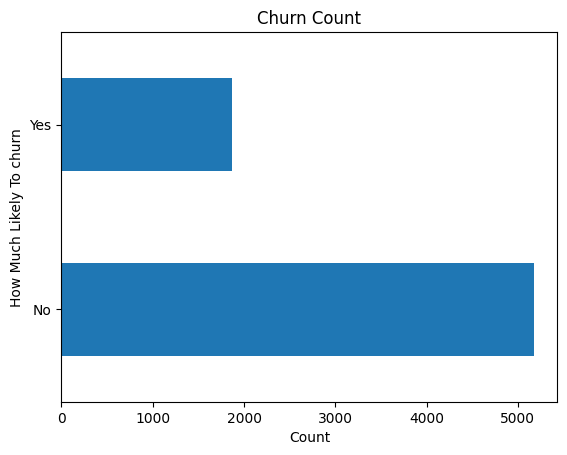

In [9]:
olddata['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("How Much Likely To churn")
plt.title("Churn Count")
plt.show()

Outliers for feature 'SeniorCitizen':
      SeniorCitizen
20                1
30                1
31                1
34                1
50                1
...             ...
7023              1
7029              1
7031              1
7032              1
7041              1

[1142 rows x 1 columns]
--------------------


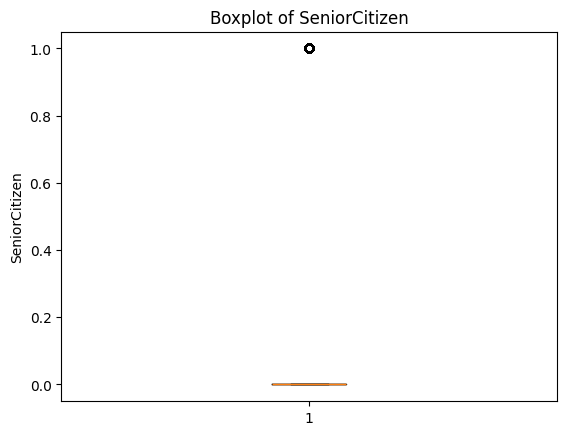

Outliers for feature 'tenure':
Empty DataFrame
Columns: [tenure]
Index: []
--------------------


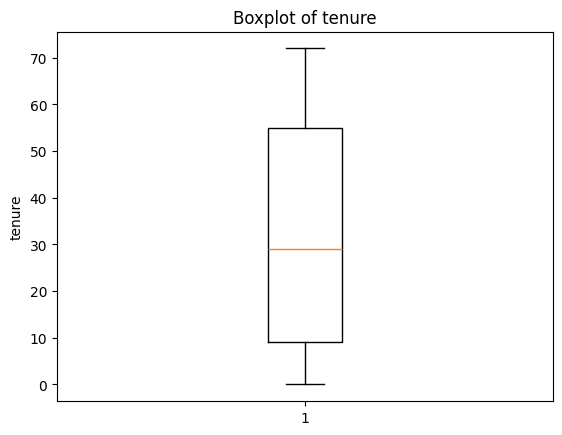

Outliers for feature 'MonthlyCharges':
Empty DataFrame
Columns: [MonthlyCharges]
Index: []
--------------------


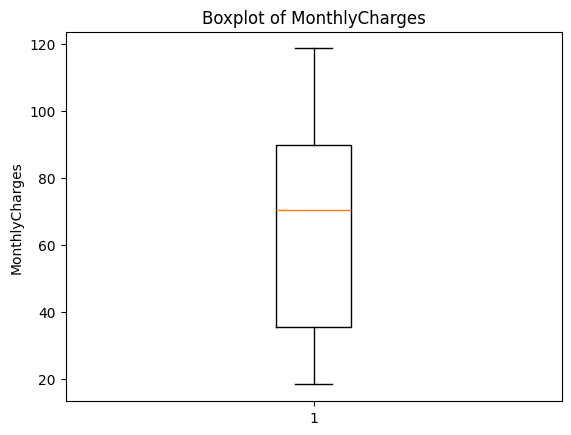

In [10]:

numerical_features = olddata.select_dtypes(include=np.number).columns

for col in numerical_features:

    Q1 = olddata[col].quantile(0.25)
    Q3 = olddata[col].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = olddata[(olddata[col] < lower_bound) | (olddata[col] > upper_bound)]


    print(f"Outliers for feature '{col}':")
    print(outliers[[col]])
    print("-" * 20)


    plt.figure()
    plt.boxplot(olddata[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


In [11]:
total_customers = len(olddata)
churned_customers = len(olddata[olddata['Churn'] == 'Yes'])
churn_percentage = (churned_customers / total_customers) * 100

print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Churn Percentage: {churn_percentage:.2f}%")
print(f"NON Churn Percentage:  {100 - churn_percentage:.2f}%")

Total Customers: 7043
Churned Customers: 1869
Churn Percentage: 26.54%
NON Churn Percentage:  73.46%


In [12]:

if 'gender' in olddata.columns:
    gender_counts = olddata['gender'].value_counts()
    print(gender_counts)

    total = len(olddata)
    male_ratio = gender_counts.get('Male', 0) / total
    female_ratio = gender_counts.get('Female', 0) / total

    print(f"\nGender Ratio:")
    print(f"Male: {male_ratio:.2%}")
    print(f"Female: {female_ratio:.2%}")
else:
    print("Error: 'gender' column not found in the DataFrame.")

gender
Male      3555
Female    3488
Name: count, dtype: int64

Gender Ratio:
Male: 50.48%
Female: 49.52%


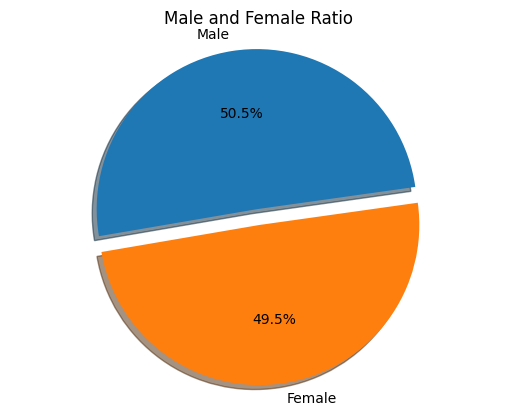

In [13]:
labels = ['Male', 'Female']
sizes = [male_ratio, female_ratio]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=8)
ax1.axis('equal')

plt.title("Male and Female Ratio")
plt.show()


Analyzing Churn vs. customerID:
Churn       No  Yes
customerID         
0002-ORFBO   1    0
0003-MKNFE   1    0
0004-TLHLJ   0    1
0011-IGKFF   0    1
0013-EXCHZ   0    1
...         ..  ...
9987-LUTYD   1    0
9992-RRAMN   0    1
9992-UJOEL   1    0
9993-LHIEB   1    0
9995-HOTOH   1    0

[7043 rows x 2 columns]


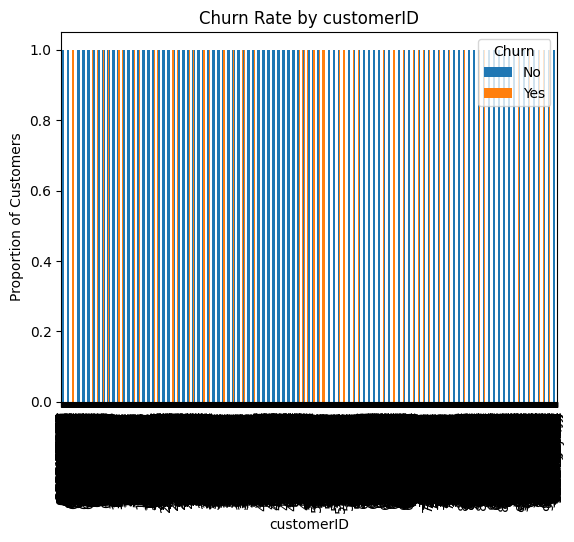


Analyzing Churn vs. gender:
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


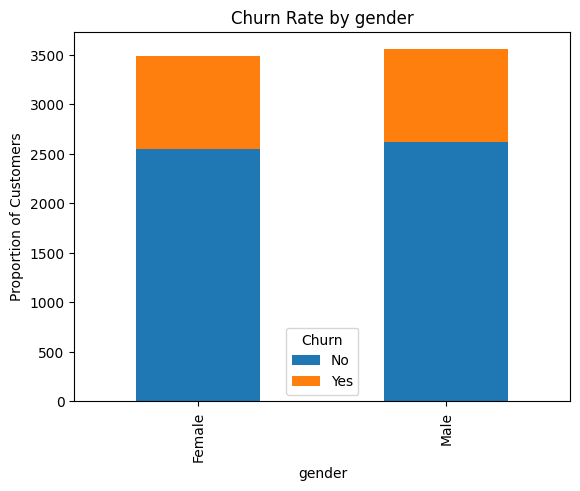


Analyzing Churn vs. SeniorCitizen:


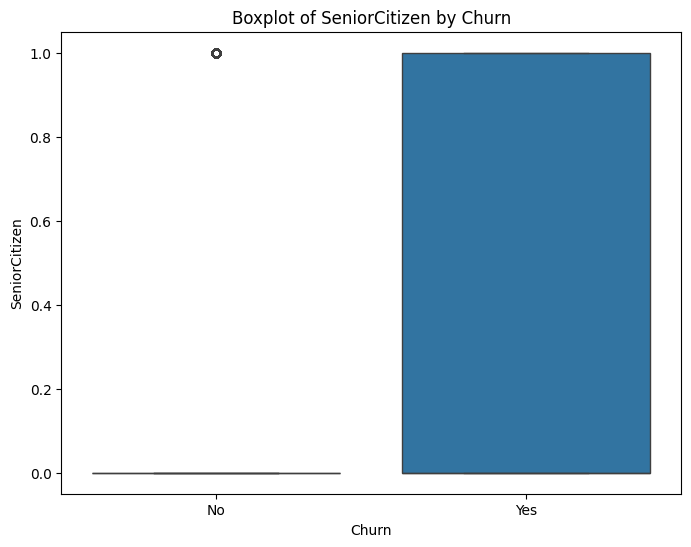

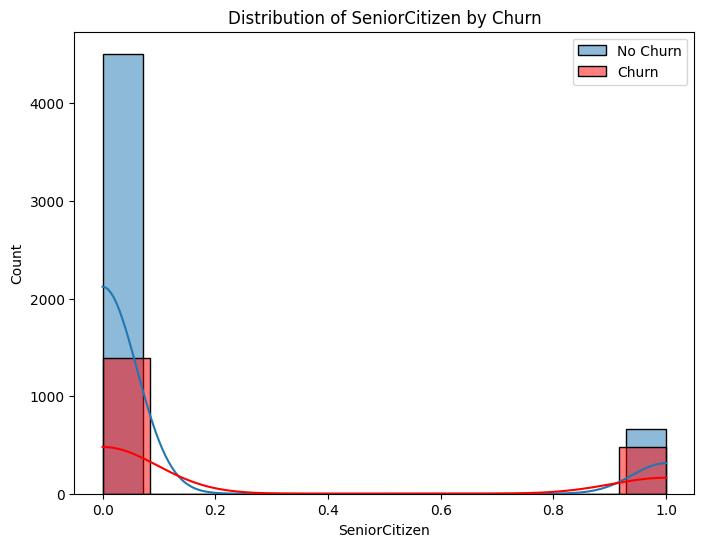

Correlation between SeniorCitizen and Churn: 0.15088932817647324

Analyzing Churn vs. Partner:
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


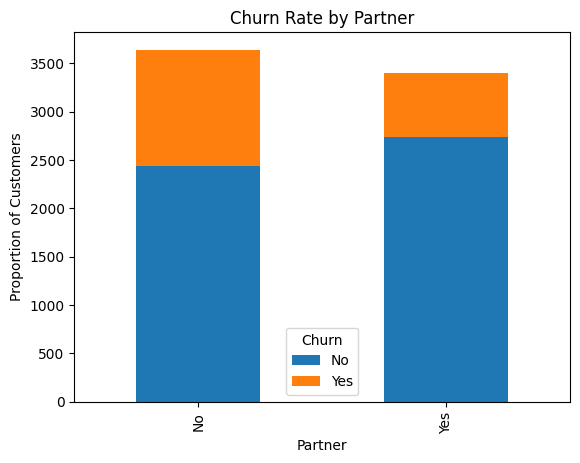


Analyzing Churn vs. Dependents:
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326


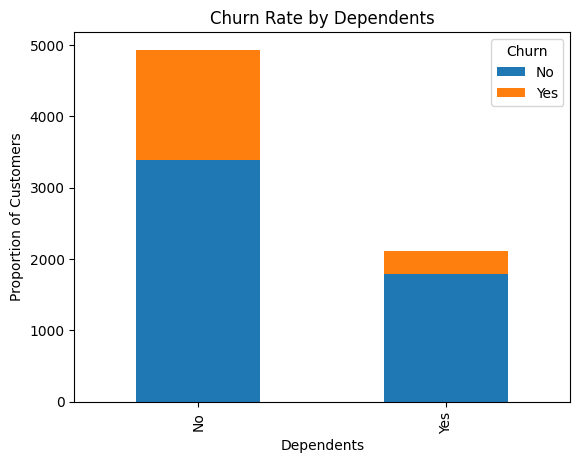


Analyzing Churn vs. tenure:


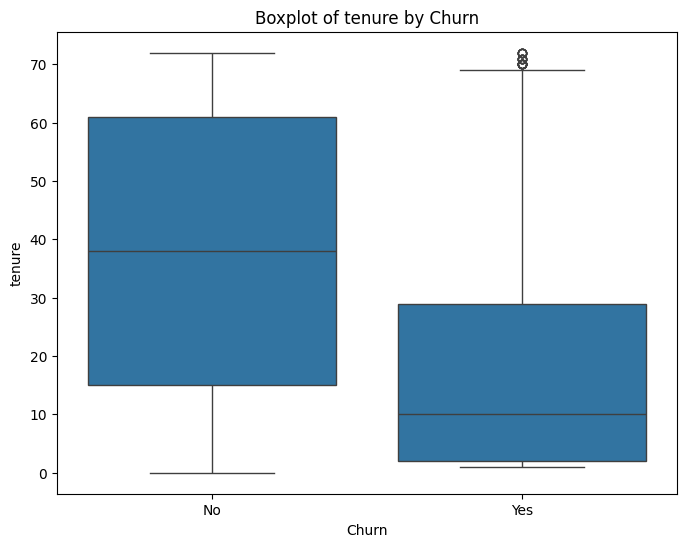

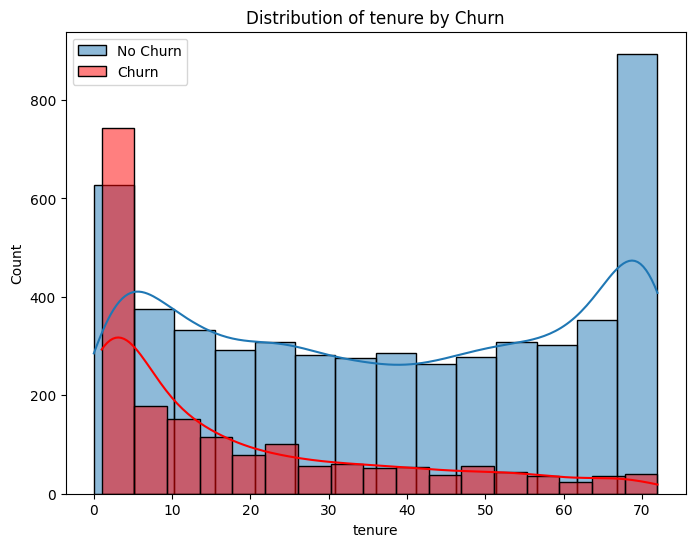

Correlation between tenure and Churn: -0.352228670113078

Analyzing Churn vs. PhoneService:
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699


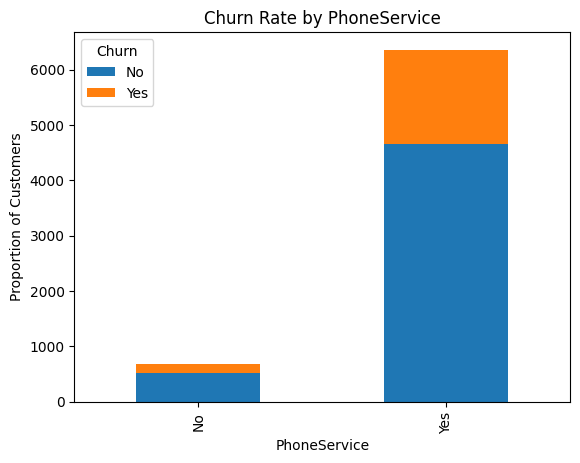


Analyzing Churn vs. MultipleLines:
Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850


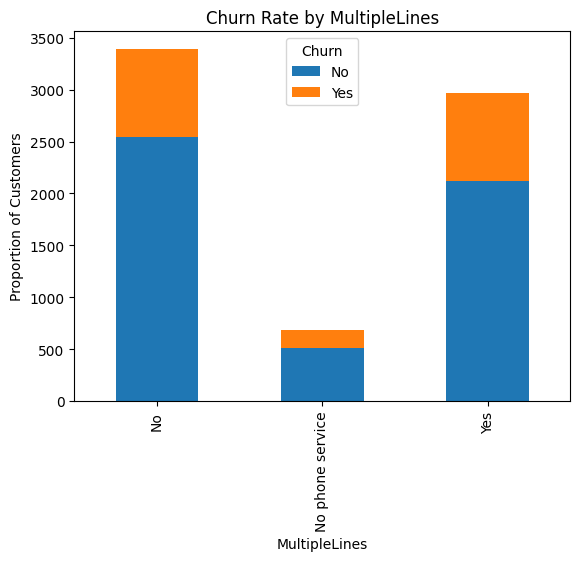


Analyzing Churn vs. InternetService:
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


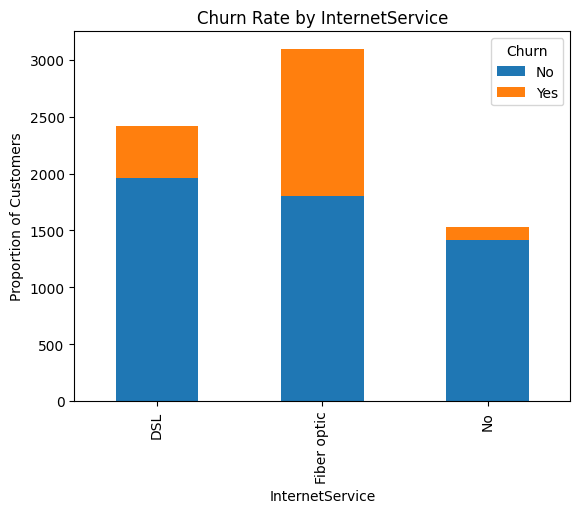


Analyzing Churn vs. OnlineSecurity:
Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295


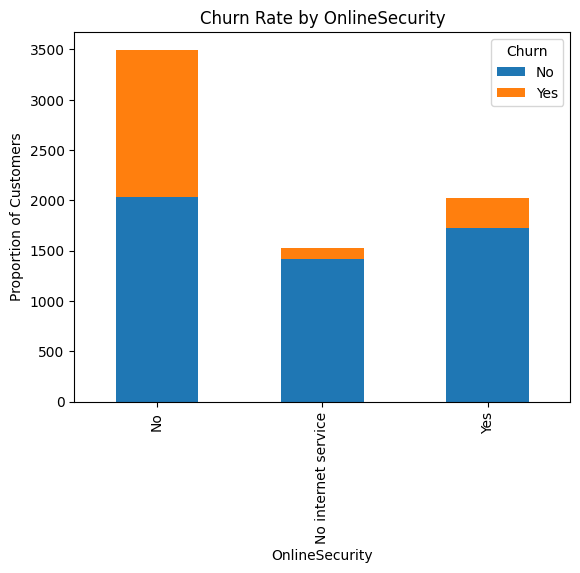


Analyzing Churn vs. OnlineBackup:
Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523


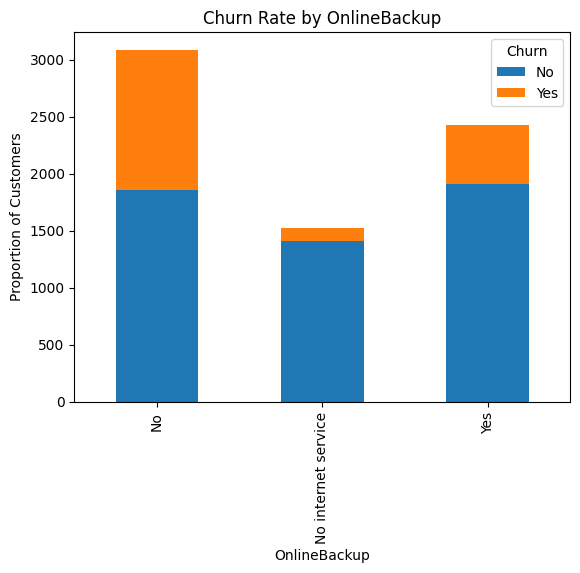


Analyzing Churn vs. DeviceProtection:
Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545


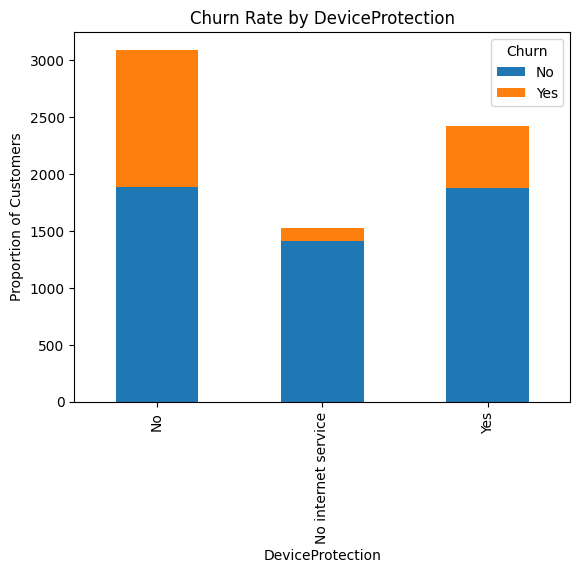


Analyzing Churn vs. TechSupport:
Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310


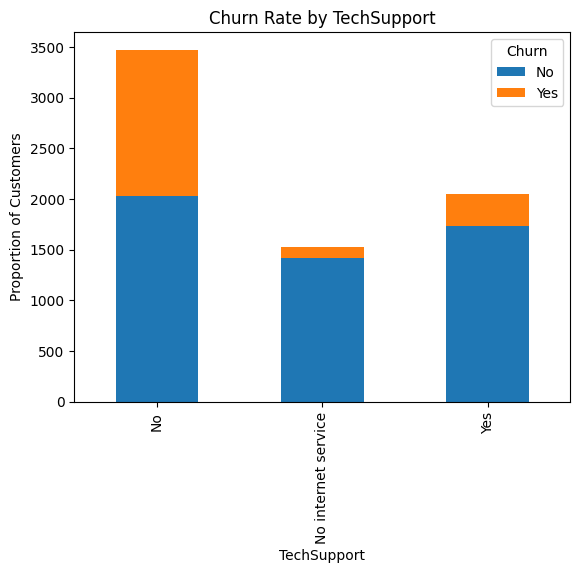


Analyzing Churn vs. StreamingTV:
Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814


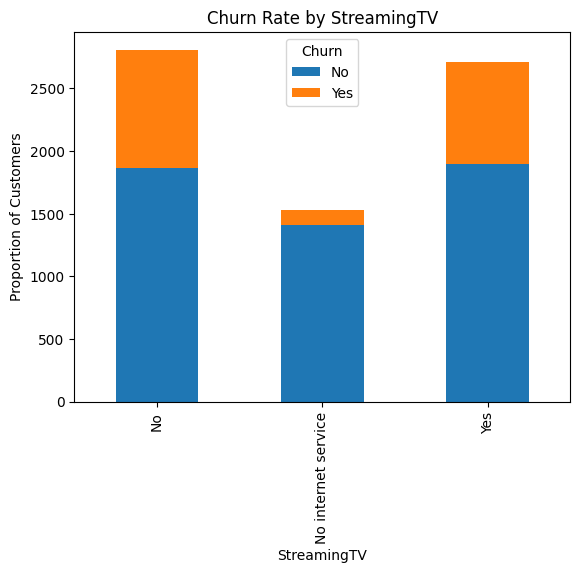


Analyzing Churn vs. StreamingMovies:
Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818


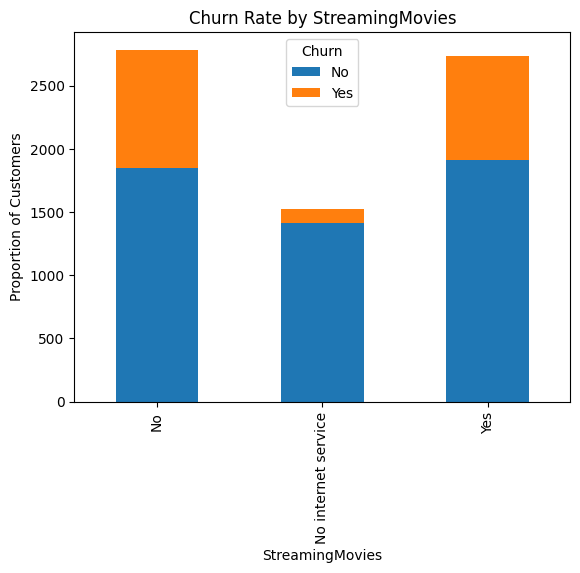


Analyzing Churn vs. Contract:
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


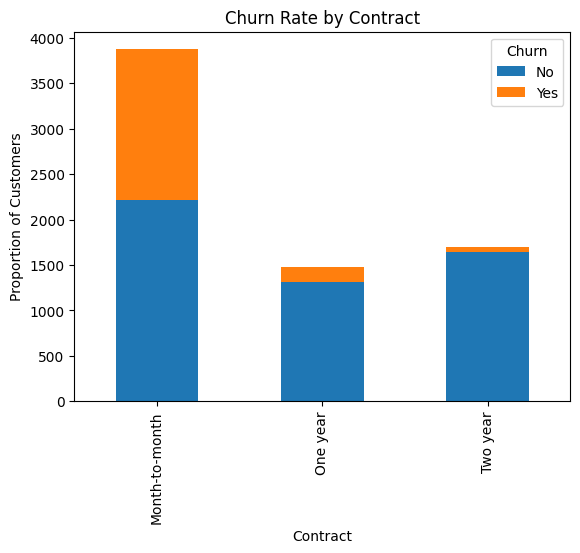


Analyzing Churn vs. PaperlessBilling:
Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400


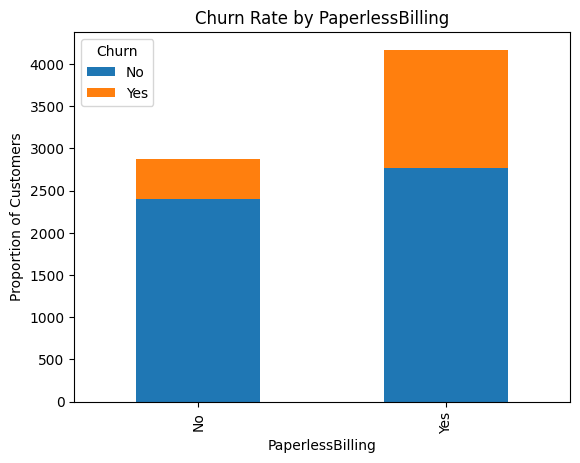


Analyzing Churn vs. PaymentMethod:
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


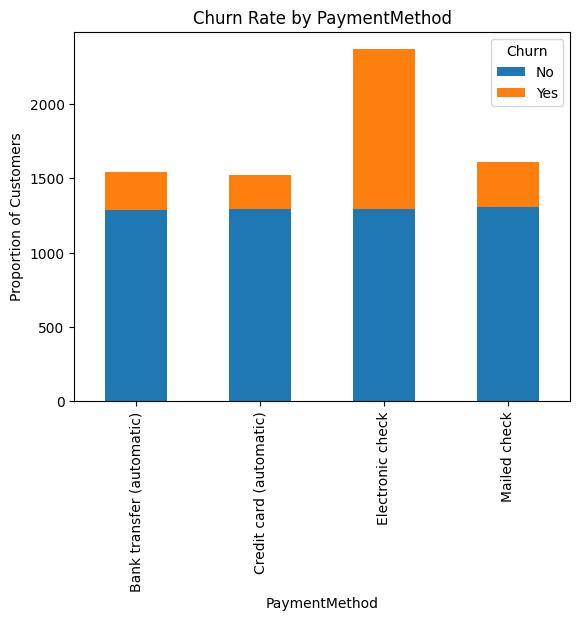


Analyzing Churn vs. MonthlyCharges:


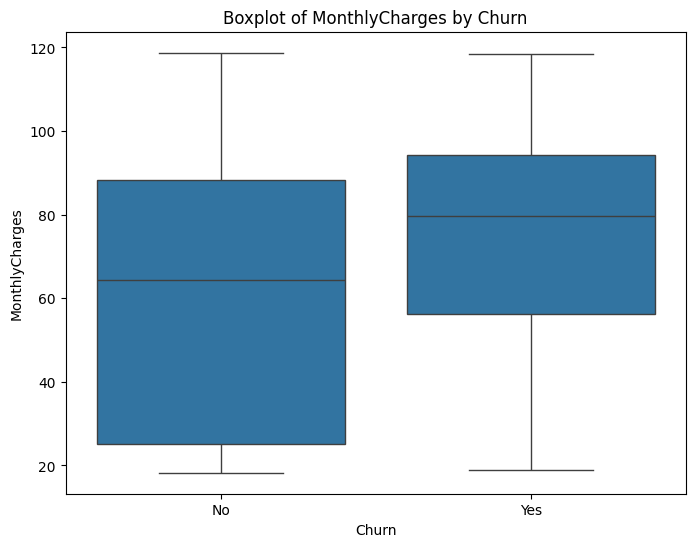

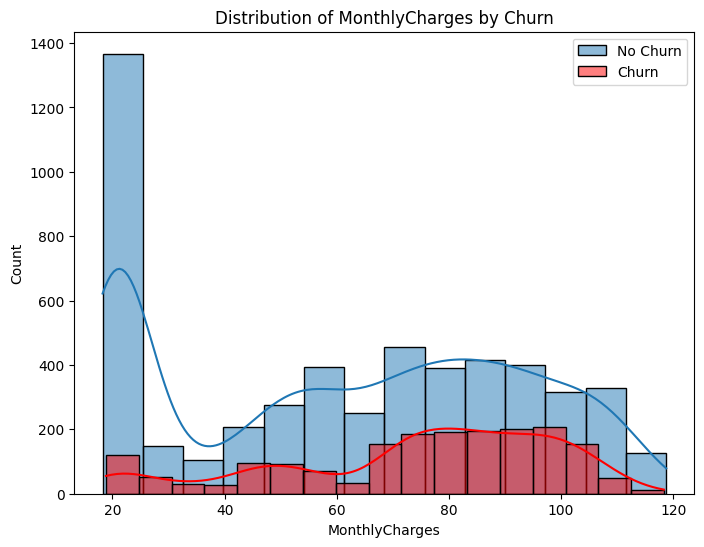

Correlation between MonthlyCharges and Churn: 0.19335642223784694

Analyzing Churn vs. TotalCharges:
Churn         No  Yes
TotalCharges         
              11    0
100.2          1    0
100.25         0    1
100.35         1    0
100.4          0    1
...           ..  ...
997.75         1    0
998.1          1    0
999.45         0    1
999.8          1    0
999.9          1    0

[6531 rows x 2 columns]


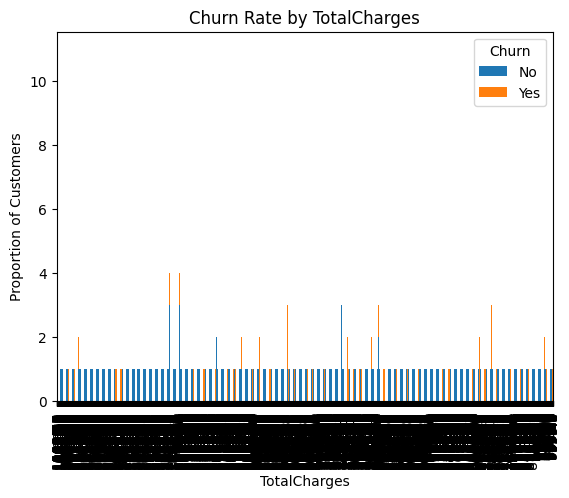


Analyzing Churn vs. Churn:
Churn    No   Yes
Churn            
No     5174     0
Yes       0  1869


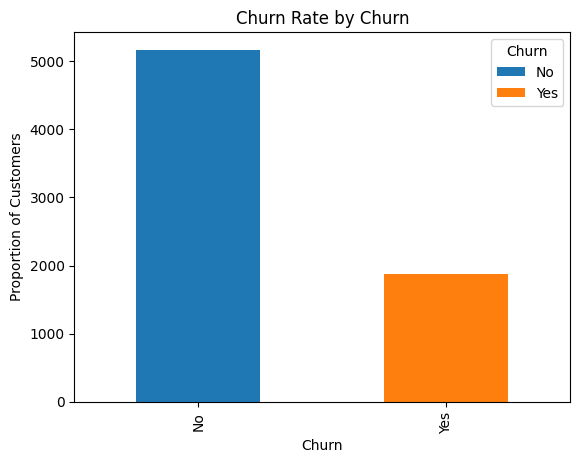

In [14]:

for column in olddata.columns:
    if olddata[column].dtype == 'object':
        print(f"\nAnalyzing Churn vs. {column}:")
        churn_by_feature = olddata.groupby([column, 'Churn'])['Churn'].count().unstack(fill_value=0)
        print(churn_by_feature)

        churn_by_feature.plot(kind='bar', stacked=True)
        plt.title(f'Churn Rate by {column}')
        plt.ylabel('Proportion of Customers')
        plt.xlabel(column)
        plt.show()
    elif olddata[column].dtype in ['int64', 'float64']:
      print(f"\nAnalyzing Churn vs. {column}:")
      plt.figure(figsize=(8, 6))
      sns.boxplot(x='Churn', y=column, data=olddata)
      plt.title(f'Boxplot of {column} by Churn')
      plt.show()

      plt.figure(figsize=(8, 6))
      sns.histplot(olddata[olddata['Churn'] == 'No'][column], label='No Churn', kde=True)
      sns.histplot(olddata[olddata['Churn'] == 'Yes'][column], label='Churn', kde=True, color='red')
      plt.title(f'Distribution of {column} by Churn')
      plt.legend()
      plt.show()


      olddata['Churn_numeric'] = olddata['Churn'].map({'No': 0, 'Yes': 1})

      correlation = olddata[column].corr(olddata['Churn_numeric'])
      print(f"Correlation between {column} and Churn: {correlation}")

      olddata.drop('Churn_numeric', axis=1, inplace = True) # Removing the temporary column

In [15]:
if 'SeniorCitizen' in olddata.columns and 'Churn' in olddata.columns:
    senior_citizens = olddata[olddata['SeniorCitizen'] == 1]
    male_senior_churners = senior_citizens[(senior_citizens['gender'] == 'Male') & (senior_citizens['Churn'] == 'Yes')]
    total_senior_citizens = len(senior_citizens)
    print(f"\nTotal Senior Citizens: {total_senior_citizens}")

    senior_gender_counts = senior_citizens['gender'].value_counts()
    print("\nSenior Citizen Gender Distribution:")
    print(senior_gender_counts)



    senior_churn_counts = senior_citizens['Churn'].value_counts(normalize=True) * 100
    print("\nChurn likelihood among Senior Citizens:")
    print(senior_churn_counts)
    totalcitizens_male_churner=len(senior_citizens[(senior_citizens['gender'] == 'Male') & (senior_citizens['Churn'] == 'Yes')])
    print(f"\nMale citizens Churner:- {totalcitizens_male_churner}")
    totalcitizens_Female_churner=len(senior_citizens[(senior_citizens['gender'] == 'Female') & (senior_citizens['Churn'] == 'Yes')])
    print(f"\nFemale citizens Churner:- {totalcitizens_Female_churner}")


else:
    print("Error")


Total Senior Citizens: 1142

Senior Citizen Gender Distribution:
gender
Male      574
Female    568
Name: count, dtype: int64

Churn likelihood among Senior Citizens:
Churn
No     58.318739
Yes    41.681261
Name: proportion, dtype: float64

Male citizens Churner:- 236

Female citizens Churner:- 240


In [16]:

if 'DeviceProtection' in olddata.columns and 'Churn' in olddata.columns:

    device_protection_churn = olddata.groupby(['DeviceProtection', 'Churn']).size().unstack(fill_value=0)

    # Calculate churn percentages for each DeviceProtection category
    device_protection_churn['Total'] = device_protection_churn.sum(axis=1)
    device_protection_churn['Churn Percentage'] = (device_protection_churn['Yes'] / device_protection_churn['Total']) * 100

    print(device_protection_churn)
else:
    print("Error: 'DeviceProtection' or 'Churn' column not found in the DataFrame.")


Churn                  No   Yes  Total  Churn Percentage
DeviceProtection                                        
No                   1884  1211   3095         39.127625
No internet service  1413   113   1526          7.404980
Yes                  1877   545   2422         22.502064


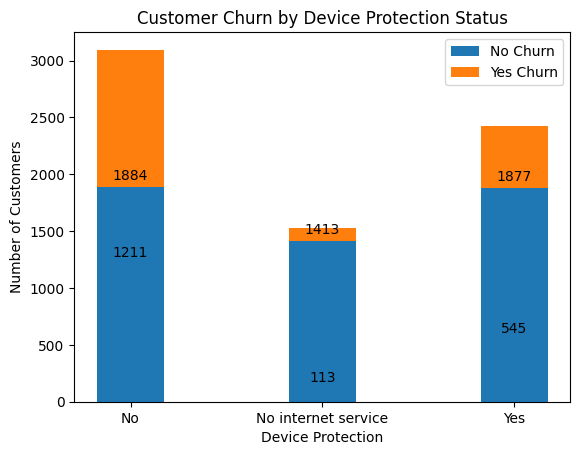

In [18]:


data = {
    'DeviceProtection': ['No', 'No internet service', 'Yes'],
    'No': [1884, 1413, 1877],
    'Yes': [1211, 113, 545],
    'Total': [3095, 1526, 2422],
    'Churn Percentage': [39.127625, 7.404980, 22.502064]
}


df = pd.DataFrame(data)


bar_width = 0.35


fig, ax = plt.subplots()
bar1 = ax.bar(df['DeviceProtection'], df['No'], bar_width, label='No Churn')
bar2 = ax.bar(df['DeviceProtection'], df['Yes'], bar_width, bottom=df['No'], label='Yes Churn')


ax.set_xlabel('Device Protection')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Churn by Device Protection Status')
ax.legend()


for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


In [19]:
if 'PaperlessBilling' in olddata.columns and 'Churn' in olddata.columns:
  PaperlessBilling_churn = olddata.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)
  PaperlessBilling_churn['Total'] = PaperlessBilling_churn.sum(axis=1)
  PaperlessBilling_churn['Churn Percentage'] = (PaperlessBilling_churn['Yes'] / PaperlessBilling_churn['Total']) * 100
  print(PaperlessBilling_churn)


Churn               No   Yes  Total  Churn Percentage
PaperlessBilling                                     
No                2403   469   2872         16.330084
Yes               2771  1400   4171         33.565092


In [20]:
if 'PhoneService' in olddata.columns and 'Churn' in olddata.columns:
  PhoneService_churn = olddata.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0)
  PhoneService_churn['Total'] = PhoneService_churn.sum(axis=1)
  PhoneService_churn['Churn Percentage'] = (PhoneService_churn['Yes'] / PhoneService_churn['Total']) * 100
  print(PhoneService_churn)

Churn           No   Yes  Total  Churn Percentage
PhoneService                                     
No             512   170    682         24.926686
Yes           4662  1699   6361         26.709637


In [21]:
if 'PaymentMethod' in olddata.columns and 'Churn' in olddata.columns:
  PaymentMethod_churn = olddata.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
  print(PaymentMethod_churn)

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


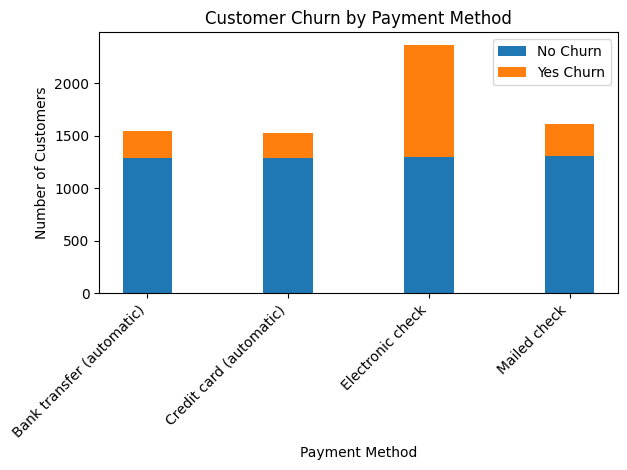

In [22]:
data = {
    'PaymentMethod': ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'],
    'No': [1286, 1290, 1294, 1304],
    'Yes': [258, 232, 1071, 308]
}


df = pd.DataFrame(data)


bar_width = 0.35


fig, ax = plt.subplots()
bar1 = ax.bar(df['PaymentMethod'], df['No'], bar_width, label='No Churn')
bar2 = ax.bar(df['PaymentMethod'], df['Yes'], bar_width, bottom=df['No'], label='Yes Churn')


ax.set_xlabel('Payment Method')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Churn by Payment Method')
ax.legend()


plt.xticks(rotation=45, ha='right')



plt.tight_layout()
plt.show()

In [23]:
newdata = olddata.copy()

In [24]:
newdata.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [25]:
newdata.drop(['customerID'],axis=1,inplace=True)

In [26]:
def tenure_to_years(tenure):
    if 0 <= tenure <= 12:
        return '0-1'
    elif 13 <= tenure <= 24:
        return '1-2'
    elif 25 <= tenure <= 36:
        return '2-3'
    elif 37 <= tenure <= 48:
        return '3-4'
    elif 49 <= tenure <= 60:
        return '4-5'
    elif tenure > 60 :
        return '5+'
    else:
        return 'Unknown'

newdata['tenure_years'] = newdata['tenure'].apply(tenure_to_years)
newdata['tenure_years'].value_counts()

newdata.drop(['tenure'],axis=1,inplace=True)



In [27]:
newdata['Churn'] = np.where(newdata['Churn'] == 'Yes', 1, 0)

In [28]:
newdata['TotalCharges'] = pd.to_numeric(newdata['TotalCharges'], errors='coerce')
newdata['MonthlyCharges'] = pd.to_numeric(newdata['MonthlyCharges'], errors='coerce')
categorical_columns = [col for col in newdata.columns
                       if col not in ['TotalCharges','MonthlyCharges','Churn'] and newdata[col].dtype=='object']

newdata_dummies = pd.get_dummies(newdata, columns=categorical_columns, dtype='int')
newdata_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_years_0-1,tenure_years_1-2,tenure_years_2-3,tenure_years_3-4,tenure_years_4-5,tenure_years_5+
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


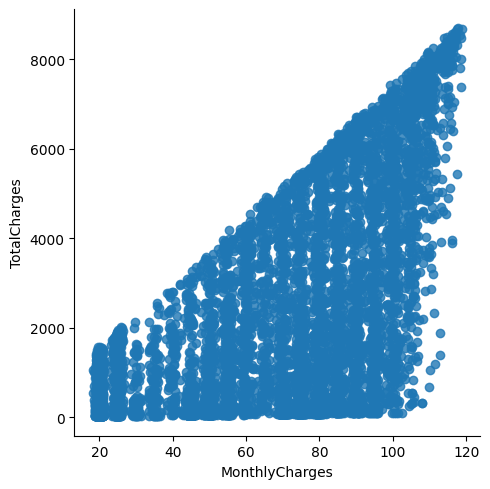

In [29]:
sns.lmplot(data=newdata_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [ ]:

newdata_dummies.to_csv('filter_churn.csv', index=False)